# 1.) What causes post-Thanksgiving fatigue?

- **Background**: After a turkey meal, blood levels of tryptophan rise, which may amplify the pineal's production of such serotonin, but not melatonin, whose synthesis rate depends on the amount of enzymes available for the subsequent biochemical reactions to occur. If turkey is not the culprit, then what besides dessert causes post-Thanksgiving torpidity? It may simply be a function of scarfing down enormous quantities of food. "Studies have indicated that stretching of the small intestine induces sleepiness and a protein–fat loading of the stomach induces sleepiness," says biologist H. Craig Heller at Stanford University in Palo Alto, Calif., "and, more blood going to the gastrointestinal tract means less going elsewhere,"—for example, the brain or skeletal muscle.

- **Objective**: Analyze dataset to gain insight on the different types of food served during Thanksgiving that can help create a product that helps adults stay awake after their meal.

- **Hypotheses**: Eating too much during Thanksgiving meal may cause post-meal fatigue.

- **Questions**: 
    1. What is the main dish served during Thanksgiving? What is the preferred way that it's cooked? 
    2. What are the common side dishes served? 
    3. What are the characteristics of the responders? (income, age, gender, geographical location)
    4. How far do responders typically travel for Thanksgiving? Could the post-meal fatigue be from traveling?
    5. What are the limitations of this dataset? 
    6. What additional data would be useful to have?

In [400]:
# Import dependencies
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from pandas.plotting import register_matplotlib_converters

In [401]:
# Read data 
thanks_path = Path('/Users/aalfiler/Sites/career_dev/AB_CaseStudy/thanksgiving-2015/thanksgiving-2015-data.csv')
thanks = pd.read_csv(thanks_path)
thanks.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [402]:
#identify column headers
list(thanks.columns)

['RespondentID',
 'Do you celebrate Thanksgiving?',
 'What is typically the main dish at your Thanksgiving dinner?',
 'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
 'How is the main dish typically cooked?',
 'How is the main dish typically cooked? - Other (please specify)',
 'What kind of stuffing/dressing do you typically have?',
 'What kind of stuffing/dressing do you typically have? - Other (please specify)',
 'What type of cranberry saucedo you typically have?',
 'What type of cranberry saucedo you typically have? - Other (please specify)',
 'Do you typically have gravy?',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower',
 

In [403]:
# check the shape of the data 
thanks.shape

(1058, 65)

In [404]:
# Remove responses who do not celebrate thanksgiving
thanks = thanks[thanks["Do you celebrate Thanksgiving?"] != 'No']

In [405]:
#verify that 'no' is dropped that only 'yes' values remain
thanks_count = len(thanks['Do you celebrate Thanksgiving?'].unique())
thanks_count

1

In [406]:
# check number of rows remaining
thanks.shape

(980, 65)

In [407]:
# remove duplicates and creates a copy of the old dataframe
thanks = thanks.drop_duplicates().copy()

## Main dish served and preferred way cooked

In [408]:
thanks = thanks.rename(columns={'What is typically the main dish at your Thanksgiving dinner?':'main_dish'})

In [557]:
# Baked turkey is the prefered thanks giving dish
main_dish = thanks.groupby('main_dish')['How is the main dish typically cooked?'].value_counts(ascending=True)
main_dish

main_dish               How is the main dish typically cooked?
Chicken                 Fried                                       2
                        Other (please specify)                      2
                        Baked                                       4
                        Roasted                                     4
Ham/Pork                I don't know                                1
                        Other (please specify)                      1
                        Roasted                                     5
                        Baked                                      22
I don't know            Fried                                       1
                        Roasted                                     1
                        I don't know                                3
Other (please specify)  Fried                                       1
                        I don't know                                1
                        Roa

# Stuffing

In [559]:
stuffing = thanks['What kind of stuffing/dressing do you typically have?']
stuffing.value_counts().sort_values(ascending=False)

Bread-based               836
None                       60
Rice-based                 42
Other (please specify)     36
Name: What kind of stuffing/dressing do you typically have?, dtype: int64

## Desserts

In [489]:
# rename columns for easy 
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Apple cobbler':'apple cobbler'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Blondies':'blondies'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Brownies':'brownies'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Carrot cake':'carrot cake'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cheesecake':'cheesecake'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cookies':'cookies'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Fudge':'fudge'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Ice cream':'ice cream'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Peach cobbler':'peach cobbler'})
thanks = thanks.rename(columns={'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - None':'none'})

In [540]:
dessert = thanks[['apple cobbler', 'blondies', 'brownies', 'carrot cake', 'cheesecake','cookies', 'fudge','ice cream','peach cobbler','none' ]]
dessert.head()

,apple cobbler,blondies,brownies,carrot cake,cheesecake,cookies,fudge,ice cream,peach cobbler,none
0,NaN,NaN,NaN,NaN,Cheesecake,Cookies,NaN,Ice cream,NaN,NaN
1,NaN,NaN,NaN,NaN,Cheesecake,Cookies,NaN,NaN,NaN,NaN
2,NaN,NaN,Brownies,Carrot cake,NaN,Cookies,Fudge,Ice cream,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [543]:
dessert.count().sort_values(ascending=False)

none             295
ice cream        266
cookies          204
cheesecake       191
brownies         128
apple cobbler    110
peach cobbler    103
carrot cake       72
fudge             43
blondies          16
dtype: int64

In [548]:
# Intialise data to Dicts of series.
dessert = {'count' : pd.Series([295, 266, 204, 191, 128, 110, 103,72,43,16],
                       index =['none', 'ice cream', ' cookies', 'cheesecake', 'brownies', 'apple cobbler', 'peach cobbler', 'carrot cake',
                              'fudge', 'blondies'])}
  
# creates Dataframe.
dessert = pd.DataFrame(dessert)
dessert

,count
none,295
ice cream,266
cookies,204
cheesecake,191
brownies,128
apple cobbler,110
peach cobbler,103
carrot cake,72
fudge,43
blondies,16


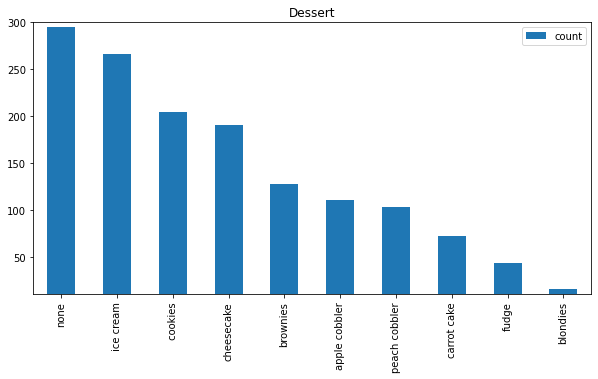

In [549]:
dessert.plot(kind='bar', figsize=(10,5), title='Dessert')
plt.ylim(10,300)
plt.show()

## Demographics

In [424]:
thanks = thanks.rename(columns={'How much total combined money did all members of your HOUSEHOLD earn last year?':'total_household_income'})
thanks.head(2)

,RespondentID,Do you celebrate Thanksgiving?,main_dish,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,total_household_income,US Region,int_age
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic,18.0
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central,18.0


In [465]:
# Examine Age
thanks["Age"].value_counts()

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64

In [464]:
thanks["Age"].describe()

count         947
unique          4
top       45 - 59
freq          269
Name: Age, dtype: object

In [487]:
# Examine gender
thanks["What is your gender?"].describe()

count        947
unique         2
top       Female
freq         515
Name: What is your gender?, dtype: object

In [468]:
# examine income brackets
def colincometointeger(income):
    if pd.isnull(income):
        return None
    else:
        splitincome = income.split()[0]
        if splitincome == "Prefer":
            return None
        else:
            splitincome = int(splitincome.replace("$", "").replace(",", ""))
            return splitincome

col = 'total_household_income'
new_col = "int_income"
thanks[new_col] = thanks[col].apply(colincometointeger)
print("--------------------")
print(thanks[new_col].value_counts(dropna=False))
print("--------------------")
print(thanks[new_col].describe())

--------------------
25000.0     166
NaN         151
75000.0     127
50000.0     127
100000.0    109
200000.0     76
10000.0      60
0.0          52
125000.0     48
150000.0     38
175000.0     26
Name: int_income, dtype: int64
--------------------
count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64


In [471]:
geography = thanks[['US Region','How would you describe where you live?']]
geography.head()

,US Region,How would you describe where you live?
0,Middle Atlantic,Suburban
1,East South Central,Rural
2,Mountain,Suburban
3,Pacific,Urban
4,Pacific,Urban


In [550]:
geography.value_counts().to_frame()

0
US Region          How would you describe where you live?     
South Atlantic     Suburban                                118
Middle Atlantic    Suburban                                 86
East North Central Suburban                                 77
Pacific            Suburban                                 61
                   Urban                                    56
South Atlantic     Rural                                    54
West South Central Suburban                                 39
East North Central Rural                                    37
Middle Atlantic    Urban                                    36
West North Central Suburban                                 35
East North Central Urban                                    31
South Atlantic     Urban                                    31
East South Central Suburban                                 28
New England        Suburban                                 26
West South Central Rural                                    26
Middle Atlantic    Rural                                    23
Mountain           Suburban                                 21
West North Central Rural                                    20
West South Central Urban                                    20
New England        Rural                                    17
West North Central Urban                                    16
East South Central Urban                                    14
                   Rural                                    14
Pacific            Rural                                    13
New England        Urban                                    12
Mountain           Urban                                    11
                   Rural                                     9

## Travel

In [485]:
travel = thanks[['How far will you travel for Thanksgiving?']]
travel.value_counts()

How far will you travel for Thanksgiving?                                       
Thanksgiving is happening at my home--I won't travel at all                         396
Thanksgiving is local--it will take place in the town I live in                     276
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    197
Thanksgiving is out of town and far away--I have to drive several hours or fly       82
dtype: int64

# Summary:
1. **What is the main dish served during Thanksgiving? What is the preferred way that it's cooked?**
    * baked turkey
    * bread-based stuffing
2. **What are the common desserts responders typically have?**
3. **What are the common characteristics of the responders? (income, age, gender, geographical location)**
    * Age: 45 - 59
    * Ave total income per household: 75,965 USD
    * Geographical location: Suburban in South Atlantic
    * Over 50% of the responders are female
4. **How far do responders typically travel for Thanksgiving? Could the post-meal fatigue be from traveling?**
    * Most responders do not travel for Thanksgiving and is happening at their
5. **What are the limitations of this dataset?**
    * The dataset does not contain information regarding responders feeling fatigue post Thanksgiving meal 
    * Questions regarding side dishes and pie use 'served' instead of 'consumed'. Food served doesn't necessarily mean it's eaten. Only food intaken matters so I focused on the desserts that the responders 'typically have'
6. **What additional data would be useful to have?**
    * Asking responders if they feel fatigued post Thanksgiving meal
    * More recent data than 2015
    * Race and Ethnicity 
    * Nutritional values on the type of food served to quantify sugar and carbs intaken
    * Preffered source of energy? Coffee, tea etc. - will the new product be consumed and comparable to the responders' preffered source of energy? 
    

# 2.) SQL

# 3.) BSM Performance Analysis

### 1. What KPIs might describe the performance of the lab? Why?
- To measure efficiency, the goal is to identify how much time is invested from shipment arrival to sample activation for lab processing.

### 2. What type of data do you think you would need to acquire in order to complete this task?
- Movement of samples must be time stamped as they move through the different systems. 
- It's important to track the operator in order to have a point person when questions arise anytime during the process
- Shipment arrival date/time, shipping condition, freezer location at intake (must be logged in appropriate storage per sample type)
- Freezer temperature must be tracked throughout the day to preserve sample integrity
- Assign each sample a unique ID and each container a unique ID. Multiple aliquots of the same sample should be assigned the same sample ID but different container ID - this is important if the client only wants to process one aliquot and hold the rest of the containers as reserve.
- Container types (gDNA plates and tubes are easier to accession compare to others)
- At intake, sample type and source determines the extraction method and sample input per assay
- Any type of discrepancies (mislabeling, metadata issues, sample integrity etc.) that prevent positively ID-ing the samples for lab processing. How long it takes to resolve these issues must also be tracked.

### 3. What would be your general course of action from start to finish?
- Consult the subject matter experts from the BSM team and learn about their current workflow 
- Check if the target metrics mentioned above are captured in CORA/LIMS 
- Identify pain points - make sure this is captured in the report 
- Create dashboard containing metrics above - filter by time of the quarter, project type (pharma, antigen map etc.) 
- QC and validate report

### 4. How do you think your performance completing this project may be measured? 
- Collaborating with the BSM team 
- Time it took to create a functioning tool for BSM to use 